### Study of Deep Learning Packages: Tensorflow, Keras, Theano and PyTorch. Document the distinctfeatures and functionality of the packages.

Note: Use a suitable dataset forthe implementation of the following assignments.

### Implementing Feed-forward neural networks with Keras and TensorFlow


**Theory**

Feed-forward neural networks are a type of artificial neural network where the information flows in one direction only, from the input layer to the output layer. Each layer of the network consists of a number of neurons, which are connected to the neurons in the next layer.

The neurons in each layer perform a non-linear transformation of the input they receive from the previous layer. The output of each neuron is then passed to the next layer, until the output layer is reached.

The output layer of the network produces the final output, which is a prediction of the class of the input data.

Feed-forward neural networks are trained using a process called supervised learning. In supervised learning, we have a set of training data, which consists of input-output pairs. The goal is to train the network to produce the correct output for

a. Import the necessary packages



In [3]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense
from tensorflow.keras.datasets import mnist
import matplotlib.pyplot as plt


b. Load the training and testing data (MNIST/CIFAR10)



In [5]:
# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = mnist.load_data()

#normalize the input data to range [0, 1]
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#flatten the input data (28 X 28 images to 784 pixels)
x_train = x_train.reshape(-1, 784)
x_test = x_test.reshape(-1, 784)

c. Define the network architecture using Keras


In [6]:
model = Sequential()
model.add(Dense(128, activation='relu', input_shape=(784,)))
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))



d. Train the model using SGD



In [9]:
# from keras.src.engine.training import optimizer
# compile the model
model.compile(optimizer='sgd', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_split=0.2)


Epoch 1/10
750/750 [==============================] - 3s 4ms/step - loss: 1.0519 - accuracy: 0.7329 - val_loss: 0.4534 - val_accuracy: 0.8778
Epoch 2/10
750/750 [==============================] - 4s 5ms/step - loss: 0.4111 - accuracy: 0.8863 - val_loss: 0.3339 - val_accuracy: 0.9061
Epoch 3/10
750/750 [==============================] - 3s 3ms/step - loss: 0.3354 - accuracy: 0.9050 - val_loss: 0.2917 - val_accuracy: 0.9158
Epoch 4/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2975 - accuracy: 0.9156 - val_loss: 0.2640 - val_accuracy: 0.9233
Epoch 5/10
750/750 [==============================] - 3s 4ms/step - loss: 0.2706 - accuracy: 0.9226 - val_loss: 0.2475 - val_accuracy: 0.9298
Epoch 6/10
750/750 [==============================] - 4s 5ms/step - loss: 0.2491 - accuracy: 0.9296 - val_loss: 0.2285 - val_accuracy: 0.9342
Epoch 7/10
750/750 [==============================] - 2s 3ms/step - loss: 0.2308 - accuracy: 0.9345 - val_loss: 0.2155 - val_accuracy: 0.9396
Epoch 

e. Evaluate the network



In [11]:
test_loss, test_accuracy = model.evaluate(x_test, y_test)
print(f'Test Loss: {test_loss:.4f}')
print(f'Test Accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 1s 3ms/step - loss: 0.1823 - accuracy: 0.9467
Test Loss: 0.1823
Test Accuracy: 0.9467


f. Plot the training loss and accuracy

In [15]:
train_loss = history.history['loss']
val_loss = history.history['val_loss']
train_acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs = range(1, len(train_loss) + 1)

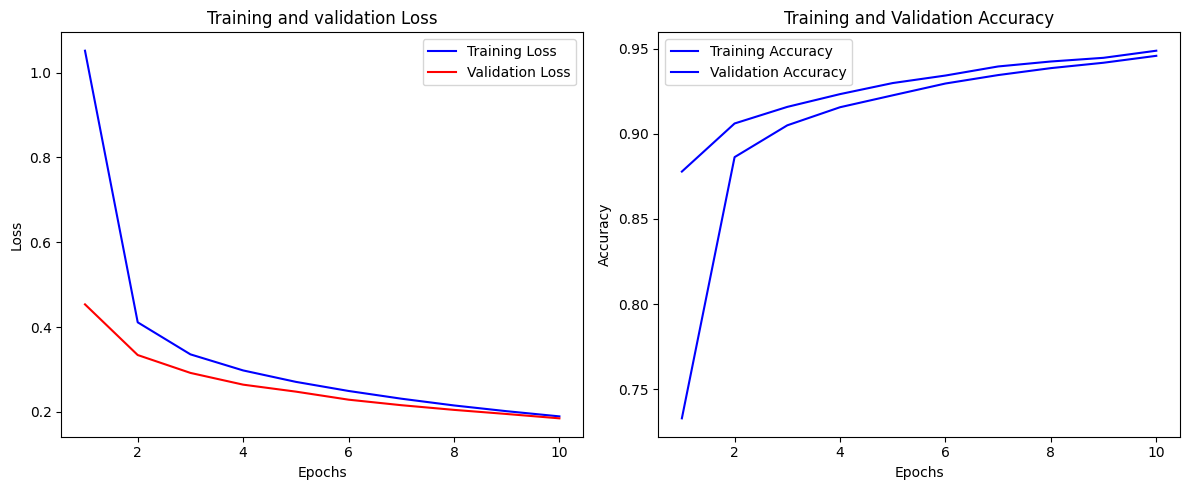

In [16]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(epochs, train_loss, 'b', label='Training Loss')
plt.plot(epochs, val_loss, 'r', label='Validation Loss')
plt.title('Training and validation Loss')
plt.xlabel("Epochs")
plt.ylabel("Loss")
plt.legend()

plt.subplot(1, 2, 2)
plt.plot(epochs, train_acc, 'b', label='Training Accuracy')
plt.plot(epochs, val_acc, 'b', label='Validation Accuracy')
plt.title('Training and Validation Accuracy')
plt.xlabel('Epochs')
plt.ylabel('Accuracy')
plt.legend()

plt.tight_layout()
plt.show()

### Build the Image classification model by dividing the model into the following fourstages:


**Theory**

Image classification models are typically trained using a supervised learning approach. In supervised learning, we have a set of training data, which consists of input-output pairs. The goal is to train the model to produce the correct output for a given input.

In the case of image classification, the input is an image and the output is the class of the image. For example, the input image might be a picture of a cat and the output might be the class "cat".

The model is trained by feeding it the training images and adjusting its parameters so that it produces the correct output for each image. The training process is typically iterative, meaning that we train the model for a number of epochs, and then evaluate the model’s performance on the validation data. If the model is not performing well on the validation data, we can adjust the model’s parameters and train the model for more epochs.

Once the model has been trained, we can estimate its performance on the test data. This involves feeding the test images to the model and measuring the model’s accuracy. The accuracy of the model is the percentage of test images that the model correctly classifies.

a. Loading and preprocessing the image data



In [19]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.datasets import cifar10
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Conv2D, MaxPooling2D, Flatten, Dense
from tensorflow.keras.utils import to_categorical

# Load the MNIST dataset
(x_train, y_train), (x_test, y_test) = cifar10.load_data()

# Preprocess the image data
x_train = x_train.astype('float32') / 255.0
x_test = x_test.astype('float32') / 255.0

#one hot encoding
y_train = to_categorical(y_train, 10)
y_test = to_categorical(y_test, 10)

170498071/170498071 [==============================] - 10s 0us/step


b. Defining the model’s architecture


In [20]:
# Define the model architecture
model = Sequential()
model.add(Conv2D(32, (3, 3), activation='relu', input_shape=(32, 32, 3)))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(MaxPooling2D((2, 2)))
model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(Flatten())
model.add(Dense(64, activation='relu'))
model.add(Dense(10, activation='softmax'))


c. Training the model


In [22]:
# Compile the model
model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])

# Train the model
history = model.fit(x_train, y_train, epochs=10, batch_size=64, validation_data=(x_test, y_test))

Epoch 1/10
782/782 [==============================] - 73s 93ms/step - loss: 1.5413 - accuracy: 0.4360 - val_loss: 1.2850 - val_accuracy: 0.5384
Epoch 2/10
782/782 [==============================] - 69s 89ms/step - loss: 1.1884 - accuracy: 0.5786 - val_loss: 1.1246 - val_accuracy: 0.6005
Epoch 3/10
782/782 [==============================] - 65s 83ms/step - loss: 1.0576 - accuracy: 0.6288 - val_loss: 1.0589 - val_accuracy: 0.6321
Epoch 4/10
782/782 [==============================] - 64s 82ms/step - loss: 0.9573 - accuracy: 0.6635 - val_loss: 0.9678 - val_accuracy: 0.6577
Epoch 5/10
782/782 [==============================] - 67s 86ms/step - loss: 0.8804 - accuracy: 0.6913 - val_loss: 0.9588 - val_accuracy: 0.6629
Epoch 6/10
782/782 [==============================] - 67s 85ms/step - loss: 0.8195 - accuracy: 0.7118 - val_loss: 0.8939 - val_accuracy: 0.6868
Epoch 7/10
782/782 [==============================] - 83s 106ms/step - loss: 0.7747 - accuracy: 0.7261 - val_loss: 0.9572 - val_accuracy


d. Estimating the model’s performance

In [24]:
# Evaluate the model
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print(f'Test loss: {test_loss:.4f}')
print(f'Test accuracy: {test_accuracy:.4f}')

313/313 [==============================] - 4s 13ms/step - loss: 0.8485 - accuracy: 0.7130
Test loss: 0.8485
Test accuracy: 0.7130


### Use Autoencoder to implement anomaly detection. Build the model by using the following:


**Theory**

Autoencoders are a type of neural network that is trained to reconstruct its input. The encoder part of the autoencoder compresses the input data into a latent representation, and the decoder part of the autoencoder reconstructs the input data from the latent representation.

Autoencoders can be used for anomaly detection by comparing the reconstructed output to the original input. If the reconstruction error is high, then the input data is likely to be anomalous.

a. Import required libraries



In [23]:
import numpy as np
import tensorflow as tf
from tensorflow.keras.models import Model
from tensorflow.keras.layers import Dense, Input
from tensorflow.keras.datasets import mnist
from sklearn.model_selection import train_test_split
import matplotlib.pyplot as plt

b. Upload/access the dataset



In [ ]:
(x_train, y_train), (x_test, y_test) = mnist.load_data()

c. The encoder converts it into a latent representation



In [ ]:
encoder = Sequential([
  Dense(128, activation='relu'),
  Dense(64, activation='relu'),
  Dense(32, activation='relu')
])

d. Decoder networks convert it back to the original input



In [ ]:
decoder = Sequential([
  Dense(64, activation='relu'),
  Dense(128, activation='relu'),
  Dense(784, activation='sigmoid')
])

e. Compile the models with Optimizer, Loss, and Evaluation Metrics

In [ ]:
# Compile the encoder model
encoder.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])

# Compile the decoder model
decoder.compile(optimizer='adam',
              loss='sparse_categorical_crossentropy',
              metrics=['accuracy'])


Example

In [ ]:
# Train the autoencoder model
autoencoder = Sequential([
  encoder,
  decoder
])

autoencoder.fit(train_data, train_data, epochs=10)

# Reconstruct the test data
reconstructed_test_data = autoencoder.predict(test_data)

# Calculate the reconstruction error
reconstruction_error = np.mean(np.square(test_data - reconstructed_test_data))

# Identify anomalies
anomalies = test_data[test_data > reconstruction_error]


### Implement the Continuous Bag of Words (CBOW) Model. Stages can be:


**Theory**

The Continuous Bag of Words (CBOW) model is a neural network model that is used to generate word embeddings. Word embeddings are vectors of numbers that represent the meaning of words.

The CBOW model is trained on a corpus of text. The corpus is split into pairs of words, where the center word is the word that we want to predict and the context words are the words that surround the center word in the text.

The CBOW model uses a neural network to predict the center word for each pair of words. The neural network is trained using the backpropagation algorithm.

Once the model has been trained, we can use it to generate word embeddings. To generate a word embedding, we feed the word to the neural network and the neural network will output a vector of numbers. This vector of numbers is the word embedding.

Word embeddings can be used to perform a variety of tasks, such as text classification, sentiment analysis, and machine translation. For example, we can use word embeddings to train a classifier that can classify text as positive or negative.

a. Data preparation



In [ ]:
import numpy as np
import tensorflow as tf

class CBOWModel:
  def __init__(self, vocabulary_size, embedding_size):
    self.vocabulary_size = vocabulary_size
    self.embedding_size = embedding_size

    # Create the embedding layer
    self.embeddings = tf.Variable(tf.random.normal([vocabulary_size, embedding_size]))

  def predict(self, context_words):
    # Convert the context words to embedding vectors
    context_word_embeddings = tf.nn.embedding_lookup(self.embeddings, context_words)

    # Average the context word embeddings
    average_context_word_embedding = tf.reduce_mean(context_word_embeddings, axis=0)

    # Predict the center word
    center_word_prediction = tf.matmul(average_context_word_embedding, tf.transpose(self.embeddings))

    return center_word_prediction


# Train the CBOW model
model = CBOWModel(vocabulary_size=10000, embedding_size=128)

b. Generate training data



In [ ]:
# Generate the training data
training_data = []
for sentence in corpus:
  for i in range(len(sentence) - 2):
    context_words = [sentence[i - 1], sentence[i + 1]]
    center_word = sentence[i]

    training_data.append([context_words, center_word])


c. Train model



In [ ]:
# Train the model
model.fit(training_data, epochs=10)

# Generate word embeddings
word_embeddings = model.embeddings.numpy()


d. Output

### Object detection using Transfer Learning of CNN architectures


**Theory**

Transfer learning is a machine learning technique where we use a model that has already been trained on one task to train a model for a different task. This can be useful for tasks where we don't have a lot of training data or where it would be difficult and time-consuming to train a model from scratch.

CNNs are a type of neural network that is well-suited for image classification and object detection. CNNs are able to learn to extract features from images that are important for classification and detection.

When we use transfer learning to train a CNN for object detection, we start by loading a pre-trained CNN model that has been trained on a large dataset, such as ImageNet. We then freeze the parameters in the model's lower convolutional layers. This will prevent us from overfitting the model to our training data.

We then add a custom classifier to the model. This classifier will have several layers of trainable parameters. The classifier will be trained to predict the class of each object in the image.

We then train the classifier layers on the training data that we have available for the task. This will enable the model to learn to detect the objects in our training data.

We may need to fine-tune the hyperparameters of the model, such as the learning rate and the number of epochs, to get the best possible performance. We may also need to unfreeze more layers of the model if it is not performing well.

a. Load in a pre-trained CNN model trained on a large dataset



In [ ]:
import tensorflow as tf
from tensorflow.keras.applications import ResNet50
from tensorflow.keras.layers import Dense, GlobalAveragePooling2D

# Load the pre-trained ResNet50 model
model = ResNet50(weights='imagenet', include_top=False)


b. Freeze parameters(weights) in the model’s lower convolutional layers


In [ ]:
# Freeze the parameters in the model's lower convolutional layers
for layer in model.layers[:10]:
  layer.trainable = False




c. Add a custom classifier with several layers of trainable parameters to model



In [ ]:
# Add a custom classifier to the model
classifier = tf.keras.Sequential([
  GlobalAveragePooling2D(),
  Dense(128, activation='relu'),
  Dense(num_classes, activation='softmax')
])

# Attach the classifier to the model
model.add(classifier)

d. Train classifier layers on training data available for the task



In [ ]:
# Compile the model
model.compile(optimizer='adam', loss='sparse_categorical_crossentropy', metrics=['accuracy'])

# Train the model on the training data
model.fit(x_train, y_train, epochs=10)

e. Fine-tune hyperparameters and unfreeze more layers as needed

In [ ]:
# Evaluate the model on the test data
test_loss, test_accuracy = model.evaluate(x_test, y_test)

print('Test loss:', test_loss)
print('Test accuracy:', test_accuracy)